🧠 Title: Customer Segmentation using K-Means Clustering

A data-driven approach to group customers based on spending and income patterns using Machine Learning.

 🎯Objective

The goal of this project is to perform customer segmentation to identify distinct customer groups based on Annual Income and Spending Score.
This helps businesses understand and target their customers better.

📚Libraries Used

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


 Dataset Description

Dataset: Mall Customers Dataset

📥 Source: Kaggle - Customer Segmentation Data

| Column Name            | Description                               |
| ---------------------- | ----------------------------------------- |
| CustomerID             | Unique ID                                 |
| Gender                 | Male/Female                               |
| Age                    | Age of the customer                       |
| Annual Income (k$)     | Annual income in thousands                |
| Spending Score (1-100) | Score assigned based on customer behavior |


🔍 Exploratory Data Analysis (EDA)

Gender distribution

Age and income distribution

Spending habits visualization

In [7]:
df = pd.read_csv('/content/Mall_Customers.csv')
display(df.head())

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


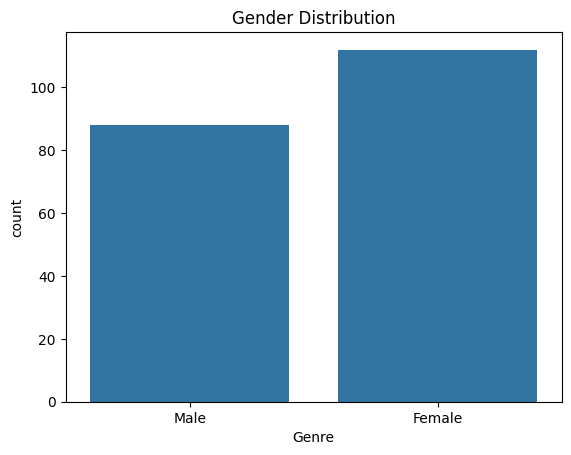

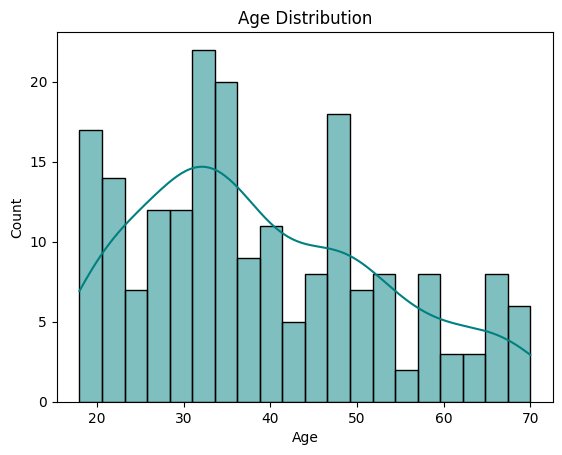

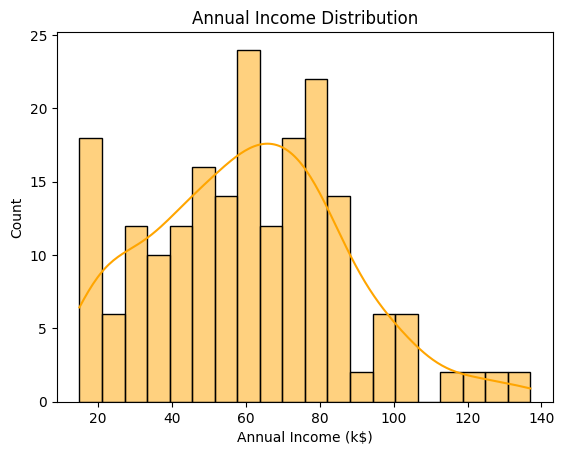

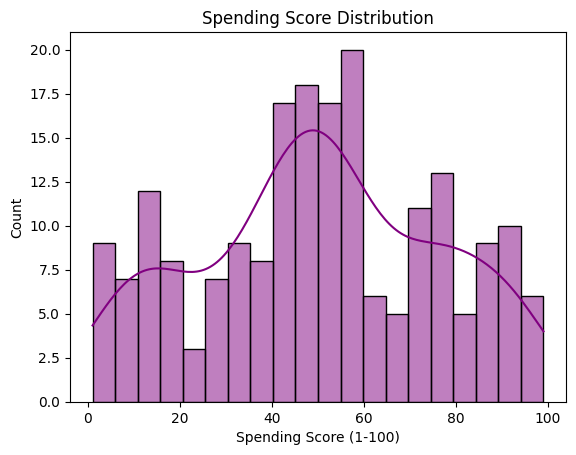

In [8]:
# Gender count
sns.countplot(x='Genre', data=df)
plt.title("Gender Distribution")
plt.show()

# Age distribution
sns.histplot(df['Age'], bins=20, kde=True, color='teal')
plt.title("Age Distribution")
plt.show()

# Annual Income
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True, color='orange')
plt.title("Annual Income Distribution")
plt.show()

# Spending Score
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True, color='purple')
plt.title("Spending Score Distribution")
plt.show()

⚙️ Model Building

We used K-Means Clustering to identify natural customer groups.

Steps:

Feature Scaling

Elbow Method to find optimal K

K-Means training and prediction

1.Feature Selection and Scaling



In [15]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


2.Elbow Method to find optimal K

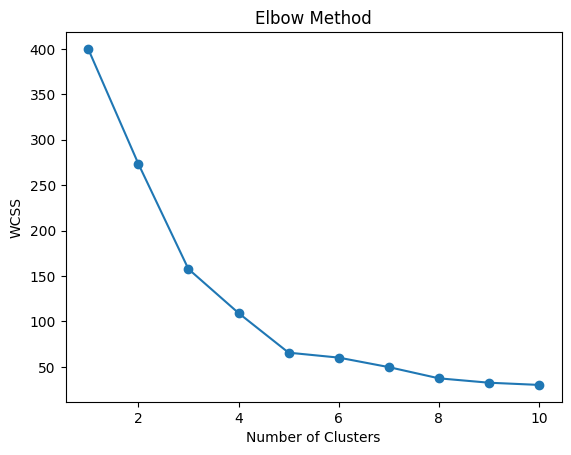

In [16]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


3.K-Means training and prediction

In [18]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


📊 Cluster Visualization

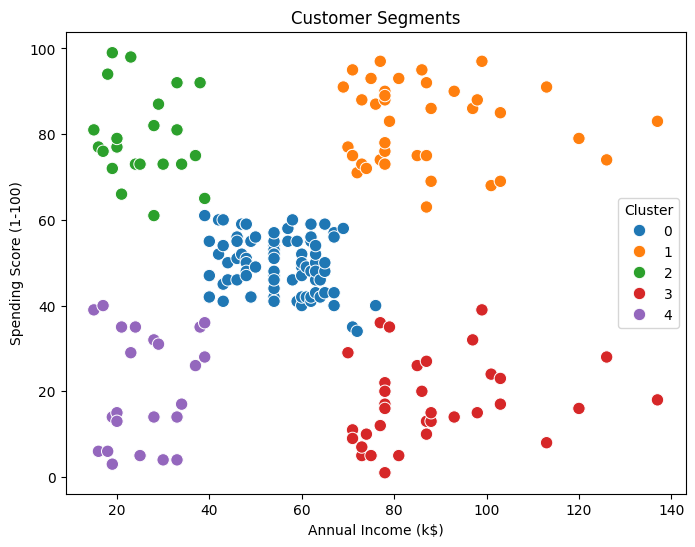

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='tab10',
    data=df,
    s=80
)
plt.title("Customer Segments")
plt.show()

📈 Insights

In [21]:
import pandas as pd

insights = pd.DataFrame({
    'Cluster': [0,1,2,3,4],
    'Description': [
        'High Income, High Spending',
        'Low Income, Low Spending',
        'Moderate Income, High Spending',
        'High Income, Low Spending',
        'Moderate Income, Moderate Spending'
    ],
    'Income Level': ['High', 'Low', 'Medium', 'High', 'Medium'],
    'Spending Level': ['High', 'Low', 'High', 'Low', 'Medium']
})
insights


,Cluster,Description,Income Level,Spending Level
0,0,"High Income, High Spending",High,High
1,1,"Low Income, Low Spending",Low,Low
2,2,"Moderate Income, High Spending",Medium,High
3,3,"High Income, Low Spending",High,Low
4,4,"Moderate Income, Moderate Spending",Medium,Medium


🏁 Conclusion

Customers can be divided into 5 segments using spending and income data.

Businesses can use these clusters to target marketing and improve customer retention.

Future work: Add more features (like purchase frequency, product category).

💾 Save and Export

In [23]:
df.to_csv("Customer_Segments.csv", index=False)
